# Exploring Your Dataset for Machine Learning

With all analysis, machine learning or not, it's best to start by getting to grips with your dataset. In this notebook we will demonstrate how to use Python to visualise and characterise the dataset.

## Key objectives
- Load, explore and visualise the dataset
- Apply basic quality criteria, like checks for missing values
- Check for class imbalance
- Calculate correlations between variables

## 1. Introducing our Dataset

### Information from Kaggle

This data set contains 416 liver patient records and 167 non liver patient records.The data set was collected from test samples in North East of Andhra Pradesh, India. 'is_patient' is a class label used to divide into groups(liver patient or not). This data set contains 441 male patient records and 142 female patient records.
Any patient whose age exceeded 89 is listed as being of age "90".

[Indian Liver Patient Dataset](https://www.kaggle.com/datasets/jeevannagaraj/indian-liver-patient-dataset)

## 2. Setting Up Our Environment

Now we understand the origins of our dataset, let's explore it. 

For this we will be using a combination of widely-used data science packages in Python. Here is a brief description of each:

- **Pandas**: A powerful data manipulation library that provides DataFrame structures ideal for working with labelled, tabular data
- **Numpy**: The fundamental package for numerical computing in Python, providing support for arrays and mathematical functions
- **Matplotlib**: A comprehensive plotting library capable of creating static, animated, and interactive visualisations
- **Seaborn**: A statistical data visualisation library that builds on matplotlib and provides a high-level interface for drawing attractive statistical graphs
- **Scikit-learn**: A machine learning library that provides simple and efficient tools for data analysis and modelling

Using a combination of these tools, we should be able to load, manipulate, and visualise our data effectively.

In [65]:
# Import our packages, giving some shorter aliases to make typing easier
import numpy as np  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder

# Set visualisation style for consistency
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

## 3. Loading and Initial Inspection

The first thing we want to do is to check that the data we have is as we expected. We can check how many rows (samples) and columns (features) we have, take a sneak-peak at the actual data, and see what types we have in each column. 

In [66]:
# Load the dataset
df = pd.read_csv("../data/indian_liver_patient.csv")

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print(f"Number of samples: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

Dataset shape: (583, 11)
Number of samples: 583
Number of features: 11


In [67]:
# Display first few rows to understand the structure
df.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [68]:
# Check data types of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           579 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


It looks like the dataframe is all numeric, with `float64` features and an integer column for the diagnosis (the labels). We can check this by counting the values of the DataFrame's `dtypes`.

In [69]:
# Check for how many unique data types are present in the dataframe
df.dtypes.value_counts()

int64      5
float64    5
object     1
Name: count, dtype: int64

## 4. Data Quality Checks

Data quality is crucial. We're lucky enough to be using a well-prepared, clean dataset, but in real-world problems that's not often the case! In this section we'll run through some common data quality checks. 

Null or missing values will often break machine learning models, so we need to appropriately handle them before we being training. There are a few common strategies for handling null values. You can remove the offending row altogether; use a replacement value (such as zero, or the average of the other values in the column); or interpolate the value based upon the other features in the row.

In [70]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print("-" * 50)
if missing_values.sum() == 0:
    print("No missing values")
else:
    print(missing_values[missing_values > 0])

Missing values per column:
--------------------------------------------------
alkphos    4
dtype: int64


In [71]:
# Replace or remove missing values

df[~df['alkphos'].isnull()]

# df['alkphos'].fillna(np.mean(df['alkphos']))

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


It's also good to check for duplicates. This is more commons than you might think. Duplicates will introduce bias in training, slightly favouring the duplicated data point.

In [72]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 13


In [73]:
# If any of our rows were duplicated, we could filter them out like this
df = df[~df.duplicated()]

## 4b - Augmenting labeled data

Text labels need to be converted to a numerical form to be read and analysed by the machine learning models

In [74]:
# Lets what our gender distribution us 

df[['gender', 'is_patient']].groupby('gender').agg('count')

,is_patient
gender,
Female,140
Male,430


In [75]:
df.reset_index(inplace=True)
df.drop(columns=['index'], inplace=True)

In [76]:
# Encode our data

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(df[categorical_columns])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns)).astype(int)

df_encoded = df.join(one_hot_df)

df_encoded = df_encoded.drop(categorical_columns, axis=1)
print(f"Encoded dataset : \n{df_encoded}")

Encoded dataset : 
     age  tot_bilirubin  direct_bilirubin  tot_proteins  albumin  ag_ratio  \
0     65            0.7               0.1           187       16        18   
1     62           10.9               5.5           699       64       100   
2     62            7.3               4.1           490       60        68   
3     58            1.0               0.4           182       14        20   
4     72            3.9               2.0           195       27        59   
..   ...            ...               ...           ...      ...       ...   
565   60            0.5               0.1           500       20        34   
566   40            0.6               0.1            98       35        31   
567   52            0.8               0.2           245       48        49   
568   31            1.3               0.5           184       29        32   
569   38            1.0               0.3           216       21        24   

     sgpt  sgot  alkphos  is_patient  gender

In [77]:
df = df_encoded

## 5. Target Variable Analysis

The goal of this kind of machine learning is to predict one aspect of a data point, based on the others. The thing you're trying to predict is called the label, the class, or the target variable. In this case, the label is the diagnosis, with two possible values: 0 (benign) and 1 (malignant).

Class imbalance can significantly affect model performance, so understanding the class distribution is crucial for machine learning. 

In [78]:
# Quick and simple way to print the distribution of our target variable
df['is_patient'].value_counts()

is_patient
1    406
2    164
Name: count, dtype: int64

In [79]:
df['is_patient'] = df['is_patient'].replace(1, 0)
df['is_patient'] = df['is_patient'].replace(2, 1)

In [80]:
# Analyse the distribution of the target variable
class_dist = df['is_patient'].value_counts()

print("Distribution of classes:")
print("-" * 50)
print(f"Not a patient: {class_dist[0]} ({class_dist[0] / len(df) * 100:.1f}%)")
print(f"Liver Patient: {class_dist[1]} ({class_dist[1] / len(df) * 100:.1f}%)")
print(f"\nClass ratio (benign:malignant): {class_dist[0]/class_dist[1]:.2f}:1")

Distribution of classes:
--------------------------------------------------
Not a patient: 406 (71.2%)
Liver Patient: 164 (28.8%)

Class ratio (benign:malignant): 2.48:1


**Note on Class Imbalance**: An unbalanced distribution of classes in the target variable can affect your predictions with machine learning. If one class dominates, the algorithm might achieve high accuracy by simply predicting the majority class. In this dataset, there is a fairly large skew towards the negative (not a patient) class, something to keep in mind for the future.

## 6. Statistical Summary of Features

A useful way to get an overview of the features is to look at the summary statistics - the mean, standard deviation, and quartile values - for each column. We can do that easily with pandas.

In [81]:
# Create a new dataframe containing only the features (excluding the target variable)
df_features = df.drop(columns=['is_patient', 'gender_Female', 'gender_Male'])

# Get statistical summary of numerical features
df_features.describe().round(2)

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos
count,570.00,570.00,570.00,570.00,570.00,570.00,570.00,570.00,566.00
mean,44.85,3.32,1.50,291.75,79.73,109.38,6.50,3.15,0.95
std,16.24,6.27,2.83,245.29,181.47,290.88,1.09,0.80,0.32
min,4.00,0.40,0.10,63.00,10.00,10.00,2.70,0.90,0.30
25%,33.00,0.80,0.20,176.00,23.00,25.00,5.80,2.60,0.70
50%,45.00,1.00,0.30,208.00,35.00,41.00,6.60,3.10,0.95
75%,58.00,2.60,1.30,298.00,60.00,86.75,7.20,3.80,1.10
max,90.00,75.00,19.70,2110.00,2000.00,4929.00,9.60,5.50,2.80


## 7. Feature Distributions

Understanding how features are distributed is essential for choosing appropriate preprocessing techniques and algorithms. Machine learning algorithms generally look for ways to separate points of different classes by finding high-dimensional patterns. These patterns are very difficult for our puny human brains to visualise, but what we can do is break down the problem and look at a couple of dimensions at a time. 

The pairplot from seaborn is a great starting tool, to see roughly at a glance if there are any pairs of features that show clear differences between the classes. If you can see multiple pairs with visual separation between classes, there is a good chance a machine learning model will be perform well. Many pairs might have slight separation with a lot of 'blur' between the classes; however, in a higher dimensional space the boundry will hopefully be more defined.

The figure comes out qutie large because we have a lot of features, so we need to reduce the size and resolution a little to make it display nicely.

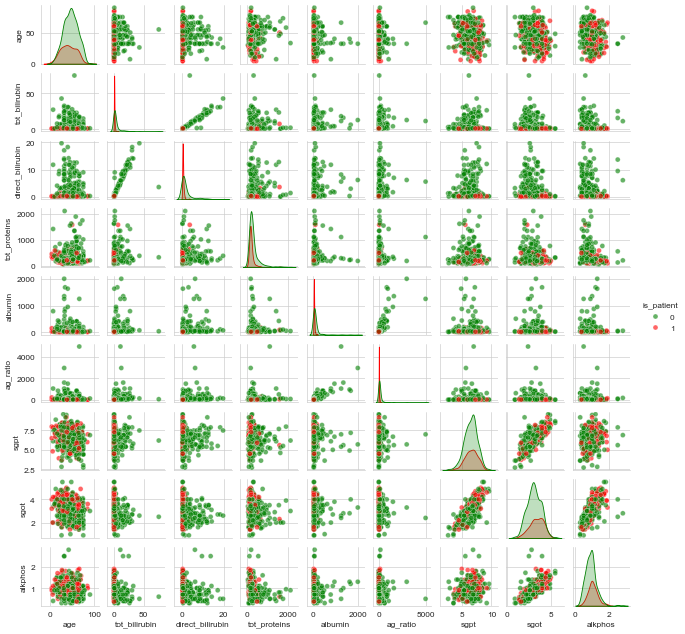

In [82]:
g = sns.pairplot(df.drop(columns=['gender_Female', 'gender_Male']), hue='is_patient', palette={0: 'green', 1: 'red'}, height=1.2, plot_kws={'alpha':0.6})
g.figure.set_dpi(60)
plt.show()

## 8. Feature Scaling and Comparison

Features often have different scales. Look at the summary statistics above; `alkphos` ranges from 0.3 to 2.80, whereas `tot_proteins` goes from 63 to 2110. Some machine learning algorithms find it difficult to compare features that range over such different magnitudes. Features whose units are larger can swamp the predictive space and have a disproportionately greater affect upon the predictions made by the algorithm. To combat this, we rescale the data so that all the features vary over the same range. We do this with the `StandardScaler()` class imported from scikit-learn (Note, there are other [scalers](https://scikit-learn.org/stable/modules/preprocessing.html#), each with their own benefits and drawbacks)

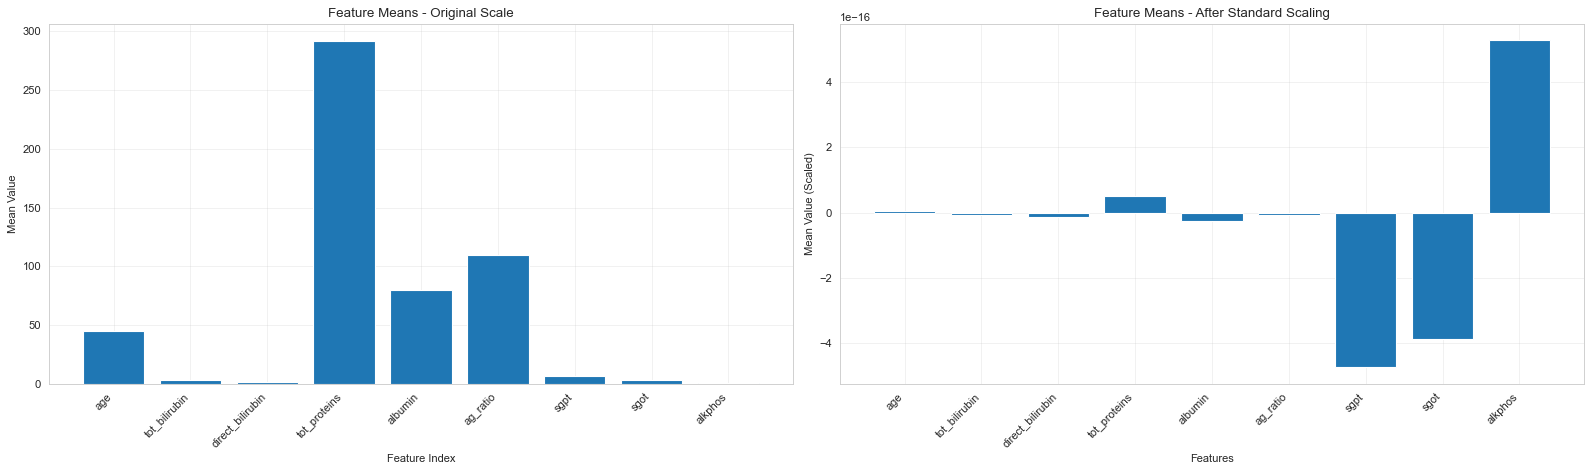

In [108]:
# Compare feature means before scaling
feature_means = df_features.mean()

# Make a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6), dpi=80)

# Original scale
ax1.bar(range(len(feature_means)), feature_means.values)
ax1.set_xlabel('Feature Index')
ax1.set_ylabel('Mean Value')
ax1.set_title('Feature Means - Original Scale')
ax1.xaxis.set_ticks(np.arange(len(df_features.columns)))
ax1.set_xticklabels(df_features.columns, rotation=45, ha='right')
ax1.grid(True, alpha=0.3)

# Apply robust scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_features)
scaled_means = pd.DataFrame(scaled_features).describe().loc['mean']

# Scaled features
ax2.bar(df_features.columns, scaled_means)
ax2.set_xlabel('Features')
ax2.set_ylabel('Mean Value (Scaled)')
ax2.set_title('Feature Means - After Standard Scaling')
ax2.xaxis.set_ticks(np.arange(len(df_features.columns)))
ax2.set_xticklabels(df_features.columns, rotation=45, ha='right')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Add our new scaled data back to the dataframe

df[df_features.columns] = scaled_features

In [114]:
df.describe()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient,gender_Female,gender_Male
count,5.700000e+02,5.700000e+02,5.700000e+02,5.700000e+02,5.700000e+02,5.700000e+02,5.700000e+02,5.700000e+02,5.660000e+02,570.000000,570.000000,570.000000
mean,6.232831e-18,-6.232831e-18,-1.246566e-17,4.986265e-17,-2.493132e-17,-6.232831e-18,-4.736952e-16,-3.864355e-16,5.272579e-16,0.287719,0.245614,0.754386
std,1.000878e+00,1.000878e+00,1.000878e+00,1.000878e+00,1.000878e+00,1.000878e+00,1.000878e+00,1.000878e+00,1.000885e+00,0.453097,0.430829,0.430829
min,-2.517211e+00,-4.665521e-01,-4.937018e-01,-9.333852e-01,-3.845741e-01,-3.419546e-01,-3.491362e+00,-2.824907e+00,-2.029114e+00,0.000000,0.000000,0.000000
25%,-7.301685e-01,-4.026792e-01,-4.583754e-01,-4.723049e-01,-3.128747e-01,-2.903418e-01,-6.403815e-01,-6.895338e-01,-7.765814e-01,0.000000,0.000000,1.000000
50%,9.297379e-03,-3.707428e-01,-4.230490e-01,-3.417335e-01,-2.466906e-01,-2.352881e-01,9.535537e-02,-6.148288e-02,6.251599e-03,0.000000,0.000000,1.000000
75%,8.103855e-01,-1.152513e-01,-6.978512e-02,2.549865e-02,-1.088070e-01,-7.786897e-02,6.471580e-01,8.177884e-01,4.759514e-01,1.000000,0.000000,1.000000
max,2.782295e+00,1.144574e+01,6.430271e+00,7.419106e+00,1.059096e+01,1.658361e+01,2.854369e+00,2.953162e+00,5.799215e+00,1.000000,1.000000,1.000000


In [116]:
df

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient,gender_Female,gender_Male
0,1.241741,-0.418647,-0.493702,-0.427421,-0.351482,-0.314428,0.279290,0.189737,-0.150315,0,1,0
1,1.056874,1.210111,1.413923,1.661722,-0.086746,-0.032278,0.923059,0.064127,-0.651328,0,0,1
2,1.056874,0.635255,0.919354,0.808927,-0.108807,-0.142385,0.463224,0.189737,-0.181628,0,0,1
3,0.810385,-0.370743,-0.387723,-0.447823,-0.362513,-0.307546,0.279290,0.315348,0.162818,0,0,1
4,1.673096,0.092336,0.177500,-0.394778,-0.290813,-0.173353,0.739125,-0.940754,-1.715981,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
565,0.933630,-0.450584,-0.493702,0.849731,-0.329421,-0.259374,-0.548414,-1.945636,-1.809921,1,0,1
566,-0.298813,-0.434616,-0.493702,-0.790573,-0.246691,-0.269697,-0.456447,0.064127,0.475951,0,0,1
567,0.440653,-0.402679,-0.458375,-0.190760,-0.174991,-0.207761,-0.088579,0.064127,0.162818,0,0,1
568,-0.853413,-0.322838,-0.352396,-0.439662,-0.279783,-0.266256,0.279290,0.315348,0.162818,0,0,1


In [117]:
df.to_csv('live_augmented.csv', index=False)

In the next notebook, we'll start to perform some modelling using classical machine learning methods.